In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('netflix_titles.csv')

## Checking main informations related to the CSV file. Including head, columns names, and shape.

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### While having a look at the head I noticed that there was a lot of missing director names. Here's the count of total directors (6173), with over 2500 being written as "NaN".
This has been a decisive factor for me to drop this column, as well as cast (same issue), date_added and description as I did not have any interest into those. While doing such I was able to narrow down my dataframe and focus more into intriguing categories. 

In [7]:
df['director'].count()

6173

In [8]:
df['director'].isnull().sum()

2634

In [9]:
df_copy=df.copy()
df_copy.drop(['director','cast','date_added', 'description'],axis=1,inplace=True)
df_copy

,show_id,type,title,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [10]:
df_copy['rating'].value_counts()

TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [11]:
df_copy['country'].replace(np.NaN,'United States',inplace=True)
df_copy['rating'].replace(np.NaN,'TV-MA',inplace=True)
df_copy.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
most_titles_produced = df_copy.groupby('country').count().sort_values('title',ascending=False).head()

most_titles_produced.reset_index(inplace=True)
most_titles_produced

,country,show_id,type,title,release_year,rating,duration,listed_in
0,United States,3649,3649,3649,3649,3649,3649,3649
1,India,972,972,972,972,972,972,972
2,United Kingdom,419,419,419,419,419,419,419
3,Japan,245,245,245,245,245,245,245
4,South Korea,199,199,199,199,199,199,199


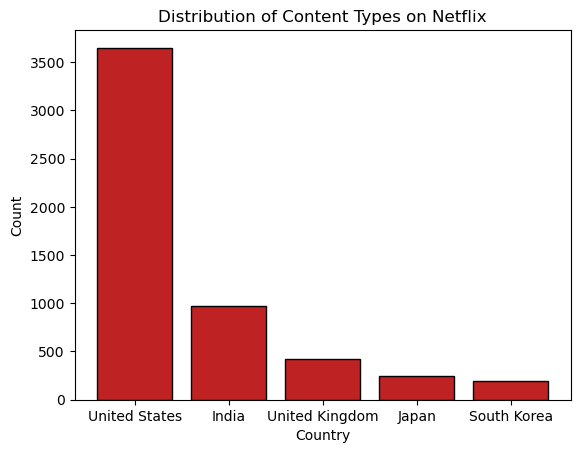

In [13]:
plt.bar(most_titles_produced.country, most_titles_produced.title, color='#bf2222', ec='black')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Types on Netflix')
plt.xticks(rotation=0)
plt.show()

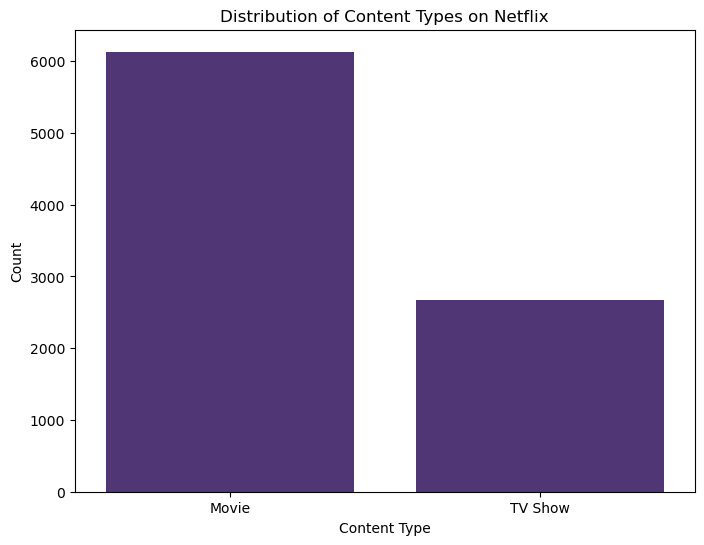

In [14]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='type', data=df_copy, color = '#502b80')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types on Netflix')
plt.xticks(rotation=0)  
plt.show();

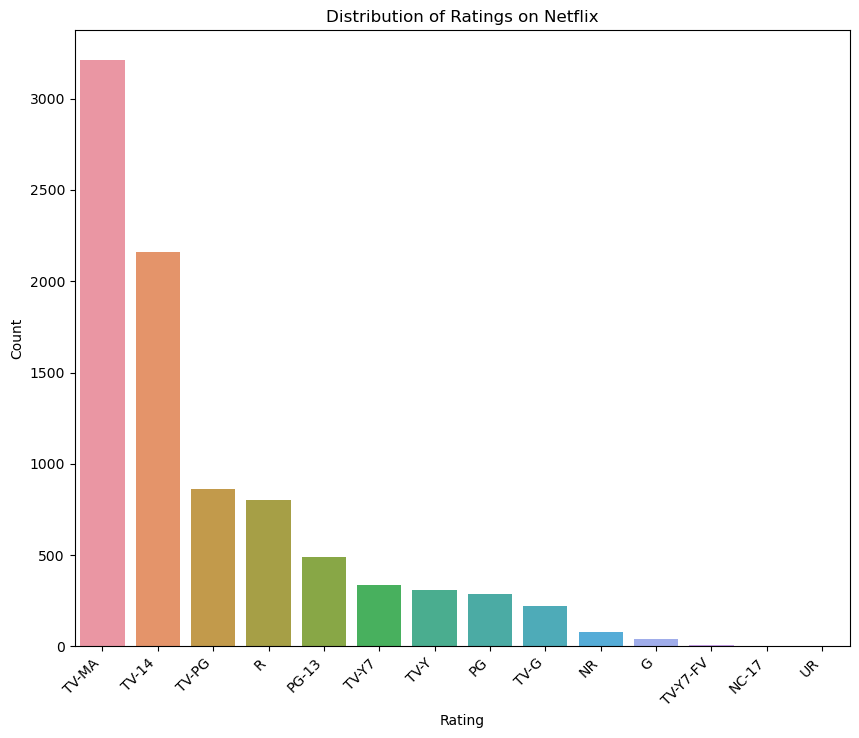

In [15]:
order = df_copy['rating'].value_counts().index


plt.figure(figsize=(10, 8))  

sns.countplot(x='rating', data=df_copy, order=order)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings on Netflix')

plt.show()

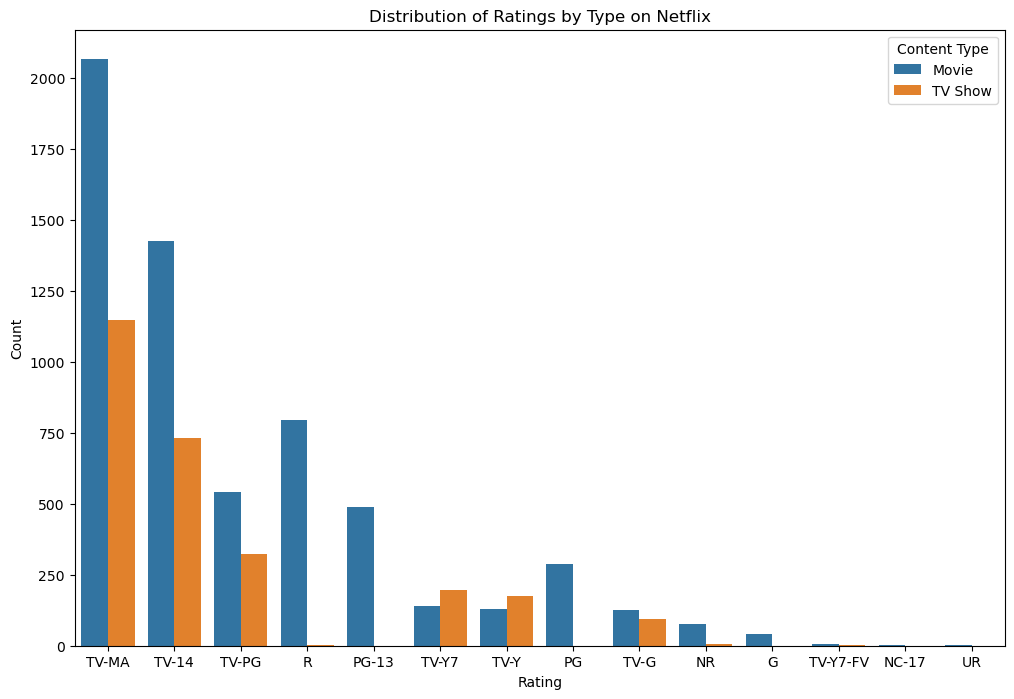

In [16]:
plt.figure(figsize=(12, 8)) 
sns.countplot(x='rating', hue='type', data=df_copy, order=order)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Type on Netflix')
plt.legend(title='Content Type', loc='upper right') 
plt.show();

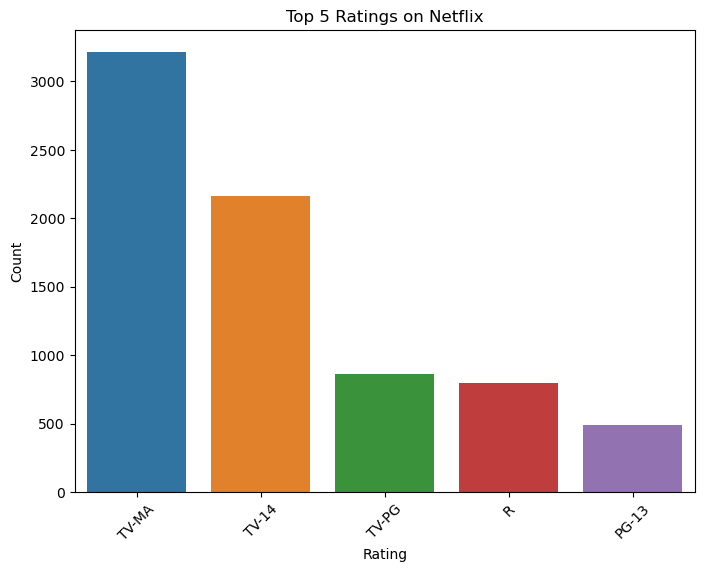

In [17]:
plt.figure(figsize=(8, 6)) 
netflix_df_copy_rating = df_copy['rating'].value_counts().head(5)  
netflix_df_copy_rating = netflix_df_copy_rating.reset_index()
netflix_df_copy_rating.columns = ['rating', 'Count']

sns.barplot(x='rating', y='Count', data=netflix_df_copy_rating)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Top 5 Ratings on Netflix')
plt.xticks(rotation=45) 
plt.show();

In [18]:
top_5_year = df_copy.groupby('release_year').count().sort_values('title',ascending=False).head(5)
top_5_year.reset_index(inplace=True)
top_5_year

,release_year,show_id,type,title,country,rating,duration,listed_in
0,2018,1147,1147,1147,1147,1147,1147,1147
1,2017,1032,1032,1032,1032,1032,1032,1032
2,2019,1030,1030,1030,1030,1030,1030,1030
3,2020,953,953,953,953,953,953,953
4,2016,902,902,902,902,902,902,902


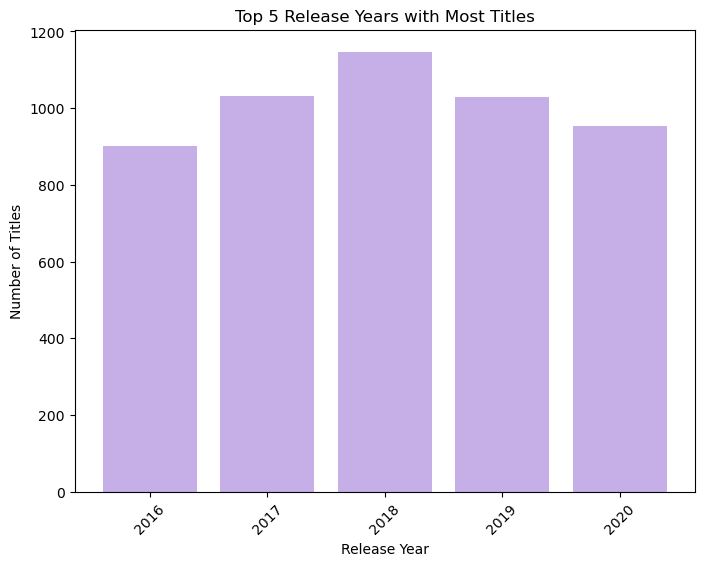

In [19]:
plt.figure(figsize=(8, 6)) 
plt.bar(top_5_year.release_year, top_5_year.title, color='#c6aee6')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Top 5 Release Years with Most Titles')
plt.xticks(rotation=45) 
plt.show();

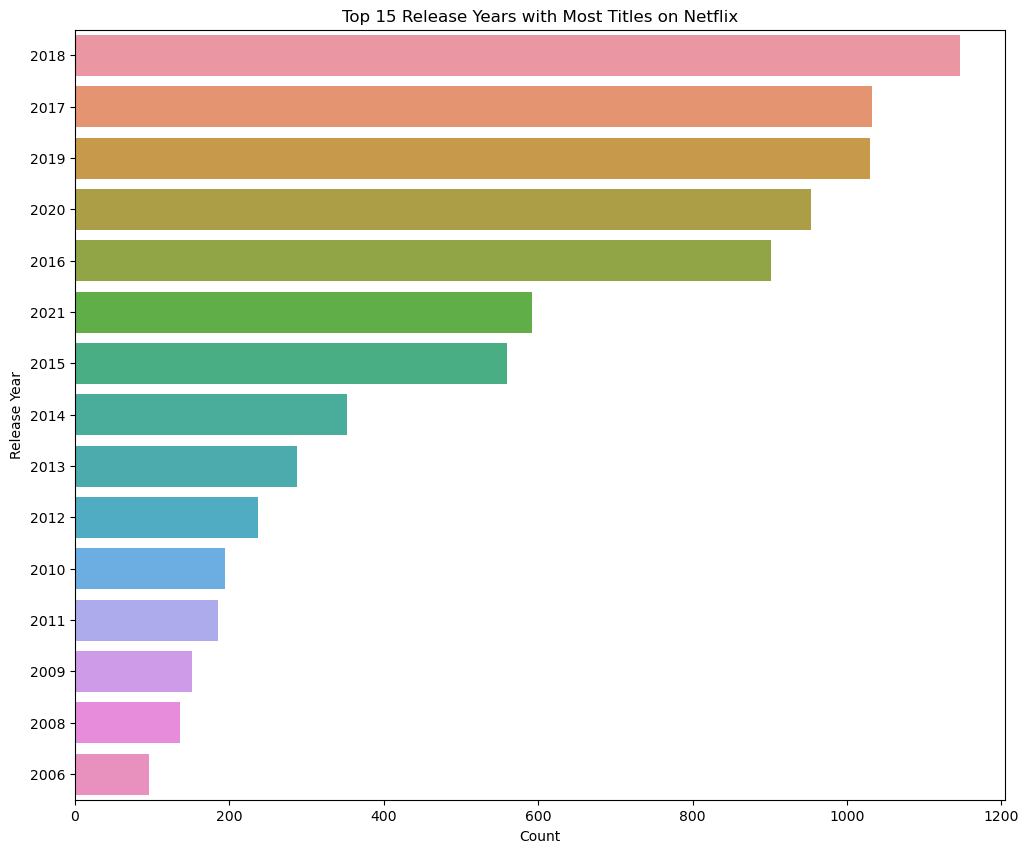

In [20]:
plt.figure(figsize=(12, 10)) 
ax = sns.countplot(y='release_year', data=df_copy, order=df_copy['release_year'].value_counts().index[:15])
ax.set_xlabel('Count')
ax.set_ylabel('Release Year')
ax.set_title('Top 15 Release Years with Most Titles on Netflix')
plt.show();